# Assignment 2 - Weather Patterns

An NOAA dataset has been stored in the file `assignment_1_data.csv`. This is the dataset to use for this assignment. Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**

In [1]:
import pandas as pd
from datetime import date as dt

df = pd.read_csv('assignment_2_data.csv').sort_values(by=['Date'])

# remove leap year day
df = df[~df['Date'].str.endswith('02-29')]
# create columns for year, month and day
df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
# tenths degrees to degrees (2 decimal points)
df['Data_Value'] = round(df["Data_Value"]/10, 2)

# create dataframes for min and max values in 2015
tmin_2015 = df[(df['Element'] == 'TMIN') & (df.year == 2015)]
tmin_2015 = tmin_2015.groupby(tmin_2015['Date'], as_index=False)['Data_Value'].min()
tmin_2015 = tmin_2015.drop(['Date'], axis=1)

tmax_2015 = df[(df['Element'] == 'TMAX') & (df.year == 2015)]
tmax_2015 = tmax_2015.groupby(tmax_2015['Date'], as_index=False)['Data_Value'].max()
tmax_2015 = tmax_2015.drop(['Date'], axis=1)

# aggregate min and max values for each day (pandas data series)
tmin = df[(df['Element'] == 'TMIN') & (df.year < 2015)]
tmin = tmin.groupby(by=[df.month, df.day], as_index=False)['Data_Value'].min()
tmax = df[(df['Element'] == 'TMAX') & (df.year < 2015)]
tmax = tmax.groupby(by=[df.month, df.day], as_index=False)['Data_Value'].max()

# filter values of 2015
tmin_2015 = tmin_2015.where(tmin_2015 < tmin).dropna()
tmax_2015 = tmax_2015.where(tmax_2015 > tmax).dropna()

print('\nSize of data series:')
print(f'tmin: {tmin.size}')
print(f'tmax: {tmax.size}')
print(f'tmin_2015: {tmin_2015.size}')
print(f'tmax_2015: {tmax_2015.size}')



Size of data series:
tmin: 365
tmax: 365
tmin_2015: 32
tmax_2015: 37


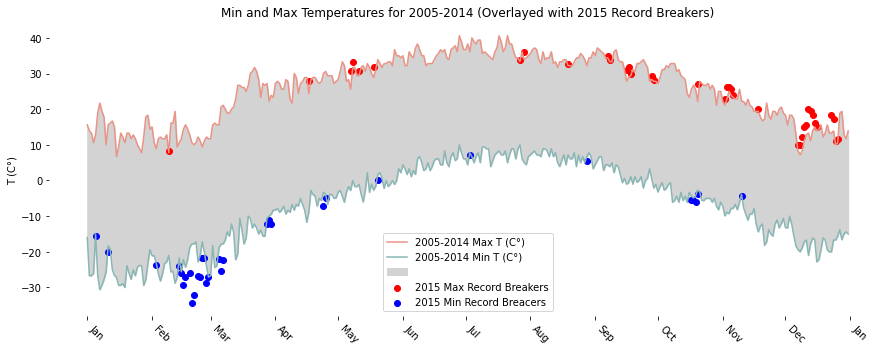

In [2]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(15, 6))

# plot min and max temperatures
plt.plot(tmax.index, tmax, color='#EB9486')
plt.plot(tmin.index, tmin, color='#88B7B5')
plt.fill_between(tmin.index, tmin['Data_Value'], tmax['Data_Value'], color='#D3D3D3')

# scatter plot 
plt.scatter(tmax_2015.index, tmax_2015.values, color='r')
plt.scatter(tmin_2015.index, tmin_2015.values, color='b')


# add title, labels, legend
plt.title('Min and Max Temperatures for 2005-2014 (Overlayed with 2015 Record Breakers)')
plt.ylabel('T (C°)')
plt.legend([
    '2005-2014 Max T (C°)', 
    '2005-2014 Min T (C°)', 
    '',
    '2015 Max Record Breakers',
    '2015 Min Record Breacers'
])

# dejunkifying
plt.box(False)
plt.tick_params(
    bottom=True,
    # left=False,
    # labelleft=False,
)

import matplotlib.dates as mdates
# set xticks
fig.autofmt_xdate()
plt.xticks(rotation=-45, ha='left')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b')) 
